In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Superstore.csv" , encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df = df.dropna(subset=['Sales'])

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("Total outliers detected:", len(outliers))
print(outliers[['Order ID', 'Product Name', 'Sales']].head())



Total outliers detected: 1167
          Order ID                                       Product Name  \
1   CA-2013-152156  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3   US-2012-108966      Bretford CR4500 Series Slim Rectangular Table   
7   CA-2011-115812                     Mitel 5320 IP Phone VoIP phone   
10  CA-2011-115812           Chromcraft Rectangular Conference Tables   
11  CA-2011-115812      Konftel 250 Conference phone - Charcoal black   

        Sales  
1    731.9400  
3    957.5775  
7    907.1520  
10  1706.1840  
11   911.4240  


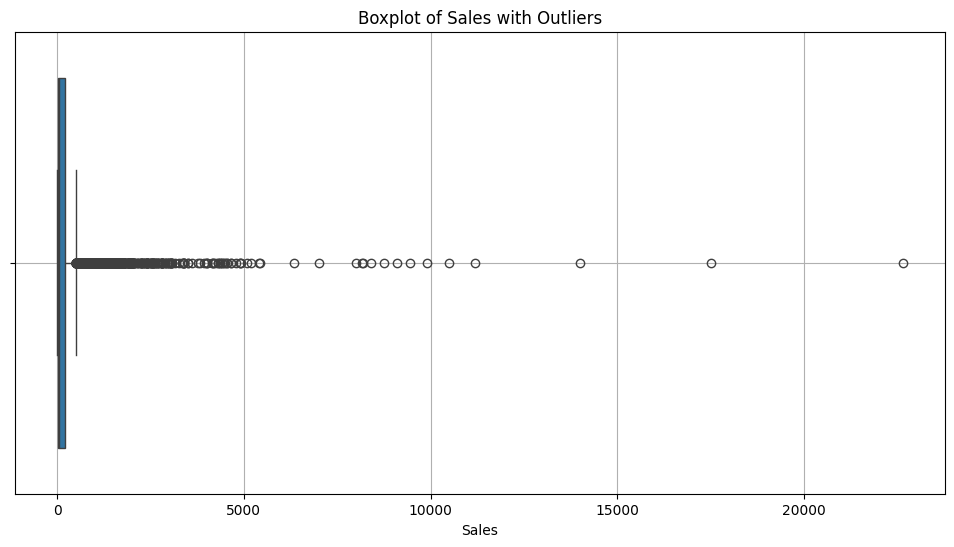

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Sales'])
plt.title("Boxplot of Sales with Outliers")
plt.xlabel("Sales")
plt.grid(True)
plt.show()